### Projeto analise de series temporais utilizando dados de vendas

Objetivo: prever vendas utilizando dados de vendas ocorridas no período de 2016-06-01 to 2022-01-01

##IMPORTACAO DOS DADOS
    Importar a tabela

##TRATAMENTO DOS DADOS

##ANALISE DOS DADOS
    
       
##CONSTRUCAO DOS GRAFICOS DE SERIES TEMPORAIS: 
    Tendencia, sazonalidade, etc e modelo.  

In [1]:
import numpy as np
#from matplotlib import pylot as plt
import pandas as pd

from pmdarima import auto_arima                  
from statsmodels.tsa.arima.model import ARIMA

from xgboost import XGBRegressor



# Importar a tabela de dados

df = pd.read_excel(r"MachineOrders03.xlsx")
df.head()
#display(df)

,Custno,Invdate,year,yearmonth,Invoice,SONO,Partno,descript,prodcl,Product Class,soldby,txnprice,Cur,Rate,totprice
0,294,2016-06-26,2016,2016-06,80956,70993.0,JSE8500,MACHINE GLAZE SPRAYER ECONOMY,72,Jelly Sprayer,HA,0.0000,CAN,1.000000,3890.00
1,2584,2016-06-27,2016,2016-06,80972,70435.0,COM1000iSV-EU-B,CAKEOMATIC 1000iSV - DEPOSIT EU,17,Cake-o-Matic,RO,0.0000,CAN,1.000000,21628.50
2,2584,2016-06-27,2016,2016-06,80972,70435.0,UVL1000iSV,UNIVERSAL 1000iSV,10,Universal,RO,0.0000,CAN,1.000000,27338.37
3,1258,2016-06-28,2016,2016-06,80975,70457.0,CDT3010SV-EU,COMPACT TABLETOP - SV EU NO-TABLE,34,Compact,MH,4486.7846,EUR,0.729927,6146.90
4,1258,2016-06-28,2016,2016-06,80975,70457.0,CDT3010SV-EU,COMPACT TABLETOP - SV EU NO-TABLE,34,Compact,MH,4486.7846,EUR,0.729927,6146.90


In [2]:
# Deletar as colunas q nao necessarias p/ facilitar o trabalho/visualizacao ("5S dos dados")

new_tab = df.drop(["Custno", "yearmonth", "year", "Invoice", "SONO", "Partno","descript", "prodcl", "Product Class", "soldby","txnprice", "Cur", "Rate"], axis = 1) 
display(new_tab)

,Invdate,totprice
0,2016-06-26,3890.00
1,2016-06-27,21628.50
2,2016-06-27,27338.37
3,2016-06-28,6146.90
4,2016-06-28,6146.90
...,...,...
6197,2022-01-20,35206.27
6198,2022-01-20,69353.79
6199,2022-01-20,74265.18
6200,2022-01-20,13780.80


In [ ]:
#TEREI QUE TRATAR OS DADOS/TABELA JUNTANDO OS DIAS E O TOTAL MEDIO DAS VENDAS E RODAR DAQUI PARA BAIXO.

In [3]:
#Identificando o tipo de variavel pq isso ira influenciar na construcao das proximas analises

new_tab.info()

#Pode ser perceber que ambas as variaveis: Invdate e totprice (vendas) ja estao classificadas OK (datetime & float).
#De qq forma a coluna Invdate tera que ser transformada em indice (eixo x), o que requerera o trabalho a seguir.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Invdate   6202 non-null   datetime64[ns]
 1   totprice  6202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 97.0 KB


In [4]:
#Transformar a coluna Invdate para ser o indice (eixo x). 

new_tab.set_index("Invdate")


,totprice
Invdate,
2016-06-26,3890.00
2016-06-27,21628.50
2016-06-27,27338.37
2016-06-28,6146.90
2016-06-28,6146.90
...,...
2022-01-20,35206.27
2022-01-20,69353.79
2022-01-20,74265.18


In [5]:
#Apos rodar o codigo acima, a "coluna" Invidate esta em negrito mostrando q foi transformada em indice (n eh coluna +)
# inplace=True -> sera utilizado para alterar o objeto original mostrando isso

new_tab.set_index("Invdate", inplace=True)   ##executar e rodar o debaixo tb p/ ver a info.

In [7]:
# inplace mostrara q DatetimeIndex (Periodo:2016-06-26 a 2022-01-20) e q antes era RangeIndex (acima).

new_tab.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6202 entries, 2016-06-26 to 2022-01-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totprice  6202 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB


In [8]:
#Calculando a estatistica descritiva
#Pode-ser perceber que a media de vendas = $22644 esta bem maior que a mediana (50% => $12979) e isso esta sendo
#impactado por valores de vendas de alguns determinados dias como por exemplo em 2018 (max = 730000 -> houve um dia
#que as vendas foram muito diferente dos demais). Nesse caso, o ideal eh entendermos o que aconteceu nesse dia.
#Percebendo que eh uma causa especial (entender a razao) ai o ideal eh excluir esse dia de vendas e gerarmos uma nova
# analise (estatistica descritiva) para se obter numeros mais reais a maioria das vendas desse periodo.

round(new_tab.describe())

,totprice
count,6202.0
mean,22644.0
std,32288.0
min,2004.0
25%,8538.0
50%,12979.0
75%,23513.0
max,730000.0


In [ ]:
#Checar os outliers para ver se eh possivel deleta-los.


<AxesSubplot:xlabel='Invdate'>

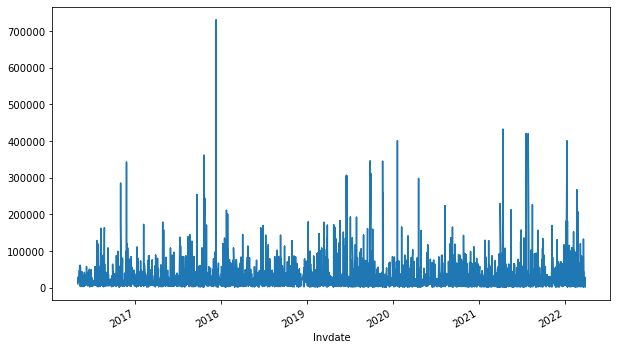

In [9]:
#Analisar o comportamento das vendas ao longo dos anos: 2017-2022
#As vendas variam de dia para dia e parecem bem aleatorios, nao parecendo ter um padrao de vendas.
#Existiram dias que vendeu bem mais que outros dias, ressaltando uma venda em especial em 2018 foi bem relevante
#(max. 730.000). 

new_tab["totprice"].plot(figsize=(10,6))


<AxesSubplot:xlabel='Invdate'>

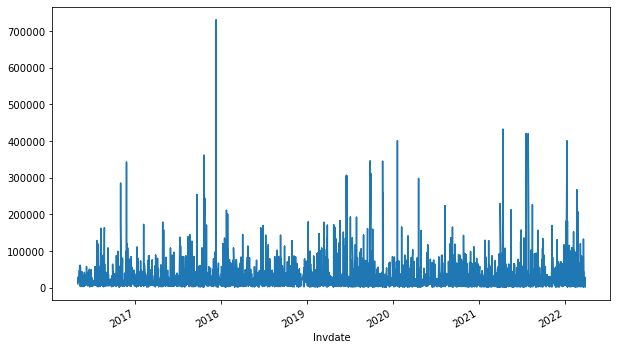

In [10]:
#Analisar a existencia de tendencia. "Preciso retirar o outlier" e rodar again
new_tab.totprice.plot(figsize=(10,6))


Rolling [window=12,center=False,axis=0]

In [15]:
#Eliminando o ruido das vendas atraves da tecncia de medias moveis baseado em 12 meses. Isso significa que a partir
#da 12a posicao  eh que sera possivel calcular a media movel. Aqui sempre preciso do valor atual mais os 11 primeiros

new_tab.totprice.rolling(12).mean()
#new_tab.totprice.rolling(12).mean().head(12)

Invdate
2016-06-26             NaN
2016-06-27             NaN
2016-06-27             NaN
2016-06-28             NaN
2016-06-28             NaN
                  ...     
2022-01-20    25986.423333
2022-01-20    31137.729167
2022-01-20    36947.994167
2022-01-20    32354.392500
2022-01-20    40172.612500
Name: totprice, Length: 6202, dtype: float64

In [16]:
#Fins didaticos: para encontrar o valor do primeiro dia 30/06/2016 precisei calcular a media dos anteriores

new_tab.totprice.rolling(12).mean().head(13)

Invdate
2016-06-26             NaN
2016-06-27             NaN
2016-06-27             NaN
2016-06-28             NaN
2016-06-28             NaN
2016-06-28             NaN
2016-06-28             NaN
2016-06-29             NaN
2016-06-29             NaN
2016-06-29             NaN
2016-06-30             NaN
2016-06-30    15403.084167
2016-06-30    16003.405833
Name: totprice, dtype: float64

<AxesSubplot:xlabel='Invdate'>

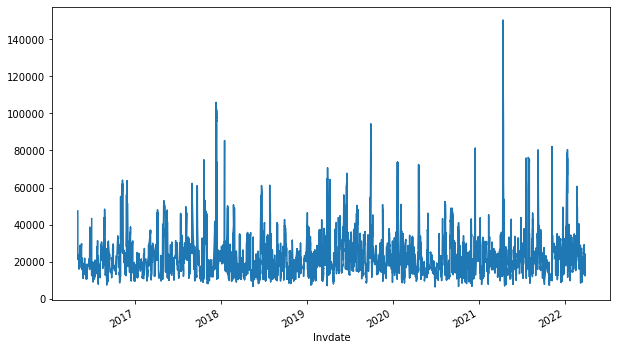

In [17]:
#Plotar o grafico para verificar o comportamento das vendas sem o ruido

new_tab.totprice.rolling(12).mean().plot(figsize=(10,6))

###Fazendo a analise de series temporais para o mesmo dados de vendas, porem usando machine learning. E ai comparando os resultados.

##Criando a variavel target (variavel criada manualmente que eh o valor q quero prever - puxei valor da linha 2 para 1, a linha 3 p/ 2 e assim sucessivamente)

In [ ]:
#total price do historico - ontem
new_tab["totprice"]

In [ ]:
#total price de amanha (criacao de uma variavel defasando ela em um dia. Isso permitira prever um dia posterior )

new_tab["totprice"].shift(-1)

In [ ]:
#comparar os valores da coluna preco "deslocado" (desejado) com o historico (totprice)
new_tab["desejado"] = new_tab["totprice"].shift(-1)
new_tab.head()

In [ ]:
#tabela mostrando que por ter puxado os valores da coluna, a ultima celula ficara sem informacao (subiu uma)
#o ultimo dia nao havera o "amanha" que sera o dia que quero prever
new_tab.tail()

In [ ]:
#Por ter puxado os valores (passo acima), a ultima celula "NaN" precisa ser deletada

new_tab = new_tab.dropna()
new_tab.tail()